In [1]:
import ROOT
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv

Welcome to JupyROOT 6.26/04


In [2]:
# csvname="/Users/kunori/skdir/CAEN/dfiles/run7/Run7_list.csv"
# csvname="/Users/kunori/skdir/CAEN/dfiles/test_beam_setup_run16/Run16_list.csv"
# csvname="/Users/kunori/skdir/CAEN/dfiles/Run60_200Th_HV55_laser_04-04-23_boxclosed_OR64_att_GreenFib_withSintBars_LaserasExtTrigger/Run60_list.csv"
# (1)
# csvname="/Users/kunori/skdir/CAEN/dfiles/Run57_200Th_HV54p5_laser_10-03-23_TLogic_OR64_att_trefTlogic_trefWindow100_trefDelay-m50/Run57_list.csv"
csvname="/Users/kunori/skdir/CAEN/dfiles/MuonTestStand/Run28_list.csv"

sipm2caen=np.array([61,63,32,34,29,31,0,2,
          59,57,38,36,27,25,6,4,
          53,55,40,42,21,23,8,10,
          51,49,46,44,19,17,14,12,
          45,47,48,50,13,15,16,18,
          43,41,54,52,11,9,22,20,
          37,39,56,58,5,7,24,26,
          35,33,62,60,3,1,30,28])

caen2sipm=np.zeros(64,dtype=int)
for i in range(0,64):
    k=i 
    caen2sipm[sipm2caen[k]]=i

    
#  x:  left to right
#  y:  bottom to top
xy2caen=np.array([35,37,43,45,51,53,59,61,
                   33,39,41,47,49,55,57,63,
                   62,56,54,48,46,40,38,32,
                   60,58,52,50,44,42,36,34,
                   3,5,11,13,19,21,27,29,
                   1,7,9,15,17,23,25,31,
                   30,24,22,16,14,8,6,0,
                   28,26,20,18,12,10,4,2])

caen2xy=np.zeros(64,dtype=int)
for i in range(0,64):
    k=i 
    caen2xy[xy2caen[k]]=i

        
print("caen2sipm",caen2sipm)
print("caen2xy",caen2xy)

caen2sipm [ 6 61  7 60 15 52 14 53 22 45 23 44 31 36 30 37 38 29 39 28 47 20 46 21
 54 13 55 12 63  4 62  5  2 57  3 56 11 48 10 49 18 41 19 40 27 32 26 33
 34 25 35 24 43 16 42 17 50  9 51  8 59  0 58  1]
caen2xy [55 40 63 32 62 33 54 41 53 42 61 34 60 35 52 43 51 44 59 36 58 37 50 45
 49 46 57 38 56 39 48 47 23  8 31  0 30  1 22  9 21 10 29  2 28  3 20 11
 19 12 27  4 26  5 18 13 17 14 25  6 24  7 16 15]


In [3]:
def unpackData(row):
    rtcode=0
    BoardID=int(row[0])
    TStamp=float(row[1])
    
    LG=np.zeros(64)
    HG=np.zeros(64)
    TOA=np.zeros(64)
    TOT=np.zeros(64)
    data_type=np.zeros(64,dtype=int)
    
    i=4
    while i<len(row):
        chid=int(row[i])
        dtype=str(row[i+1])
        LG[chid]=float(row[i+2])
        HG[chid]=float(row[i+3])
        # print(chid,dtype,LG[chid],HG[chid])
        i=i+4
        if dtype == "0x3":
            TOA[chid]=0.0
            TOT[chid]=0.0
            data_type[chid]=1
        elif dtype == "0x13":
            TOA[chid]=float(row[i])
            TOT[chid]=0.0
            data_type[chid]=2
            i=i+1
        elif dtype == "0x33":
            TOA[chid]=float(row[i])
            TOT[chid]=float(row[i+1])
            data_type[chid]=3
            i=i+2
        else:
            data_type[chid]=4
            print("unpackData:  unkown data_type",dtype)
            rtcode=1
        
    # print(BoardID,TStamp)
    return rtcode,TStamp,LG,HG,TOA,TOT,data_type
    
    

eventCount= 2  (orange: TOA tagged)


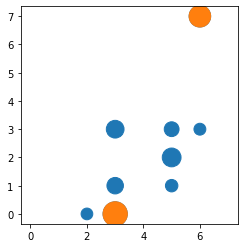

eventCount= 3  (orange: TOA tagged)


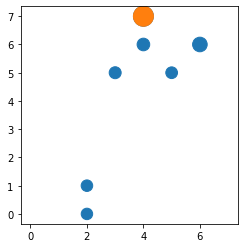

eventCount= 5  (orange: TOA tagged)


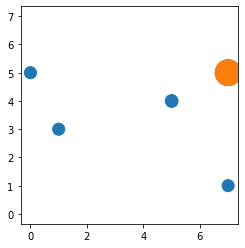

eventCount= 6  (orange: TOA tagged)


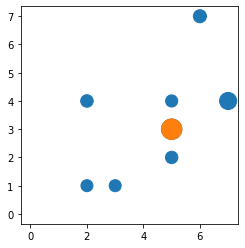

eventCount= 10  (orange: TOA tagged)


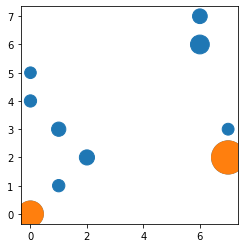

eventCount= 12  (orange: TOA tagged)


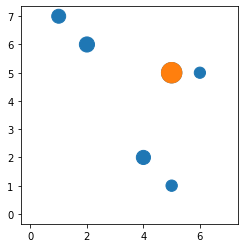

eventCount= 13  (orange: TOA tagged)


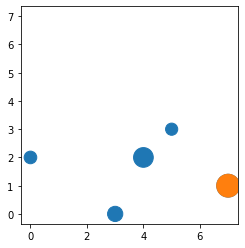

eventCount= 14  (orange: TOA tagged)


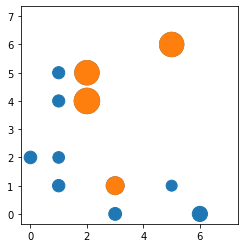

eventCount= 16  (orange: TOA tagged)


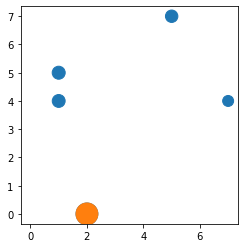

eventCount= 18  (orange: TOA tagged)


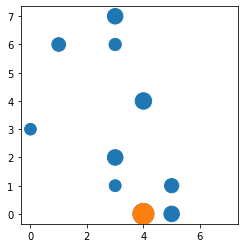

eventCount= 19  (orange: TOA tagged)


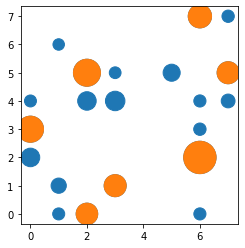

eventCount= 21  (orange: TOA tagged)


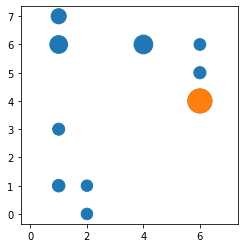

eventCount 24   nTotal= 2
DeltaTOA:    0.0 toa  383.0  383.0 kx  7
hg:      647.0  395.0    (ped not subtracted)
TOT:      54.0   20.0
hg/TOT:     11.06  17.25   (assume hg ped 50)
eventCount= 24  (orange: TOA tagged)


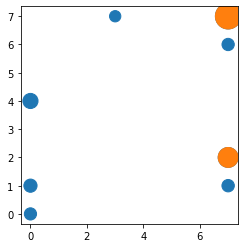

eventCount 26   nTotal= 2
DeltaTOA:   -4.0 toa  380.0  384.0 kx  3
hg:      750.0  461.0    (ped not subtracted)
TOT:      62.0   44.0
hg/TOT:     11.29   9.34   (assume hg ped 50)
eventCount= 26  (orange: TOA tagged)


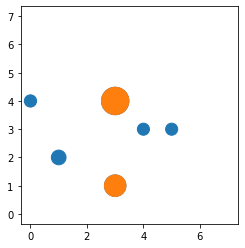

eventCount= 30  (orange: TOA tagged)


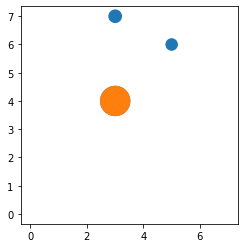

eventCount= 31  (orange: TOA tagged)


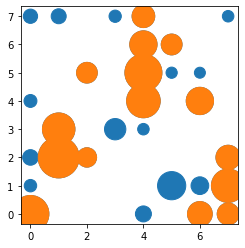

eventCount= 32  (orange: TOA tagged)


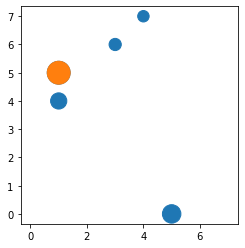

eventCount= 33  (orange: TOA tagged)


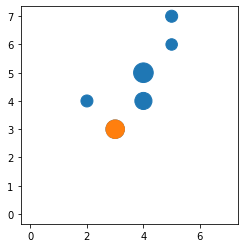

eventCount= 35  (orange: TOA tagged)


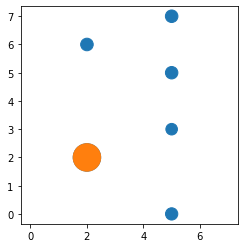

eventCount= 40  (orange: TOA tagged)


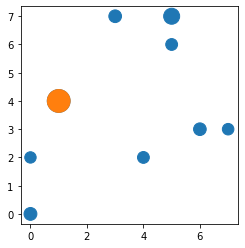

eventCount= 45  (orange: TOA tagged)


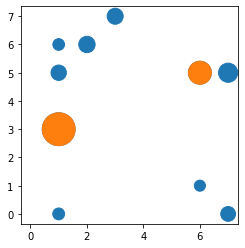

eventCount= 49  (orange: TOA tagged)


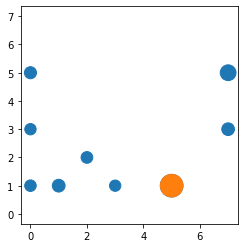

eventCount 52   nTotal= 2
DeltaTOA:    7.0 toa  392.0  385.0 kx  0
hg:      443.0  538.0    (ped not subtracted)
TOT:      31.0   31.0
hg/TOT:     12.68  15.74   (assume hg ped 50)
eventCount= 52  (orange: TOA tagged)


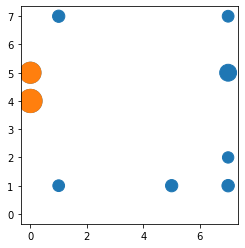

eventCount= 53  (orange: TOA tagged)


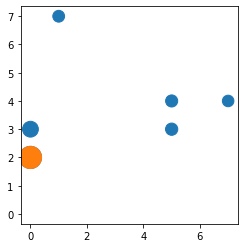

eventCount= 55  (orange: TOA tagged)


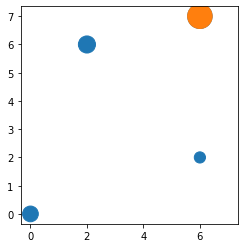

eventCount= 61  (orange: TOA tagged)


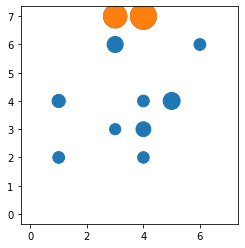

eventCount= 63  (orange: TOA tagged)


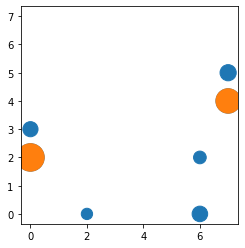

eventCount= 65  (orange: TOA tagged)


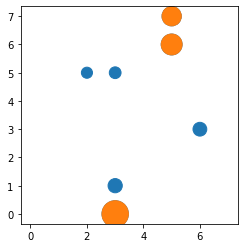

eventCount= 66  (orange: TOA tagged)


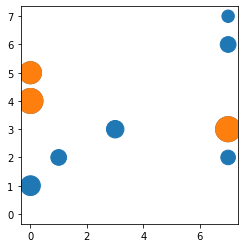

eventCount= 69  (orange: TOA tagged)


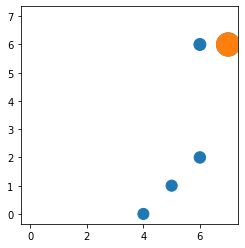

eventCount= 70  (orange: TOA tagged)


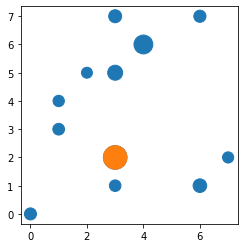

eventCount= 73  (orange: TOA tagged)


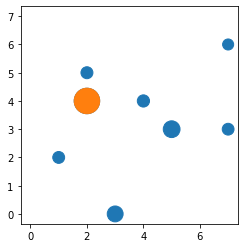

eventCount= 74  (orange: TOA tagged)


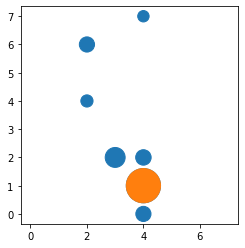

eventCount= 75  (orange: TOA tagged)


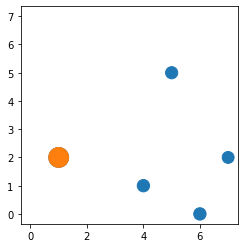

eventCount= 78  (orange: TOA tagged)


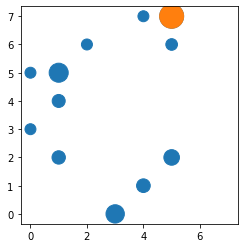

eventCount= 80  (orange: TOA tagged)


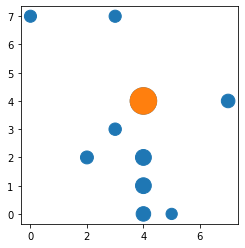

eventCount= 84  (orange: TOA tagged)


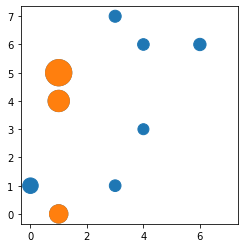

eventCount= 85  (orange: TOA tagged)


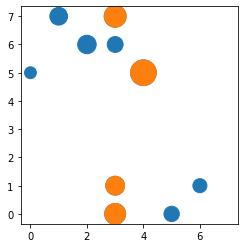

eventCount= 88  (orange: TOA tagged)


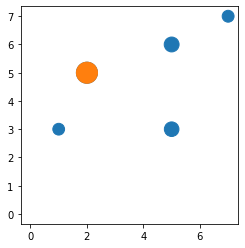

eventCount 91   nTotal= 2
DeltaTOA:  -11.0 toa  386.0  397.0 kx  2
hg:      416.0  379.0    (ped not subtracted)
TOT:      29.0   17.0
hg/TOT:     12.62  19.35   (assume hg ped 50)
eventCount= 91  (orange: TOA tagged)


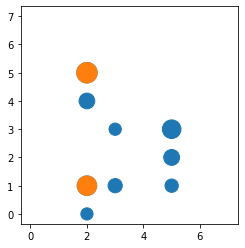

eventCount= 92  (orange: TOA tagged)


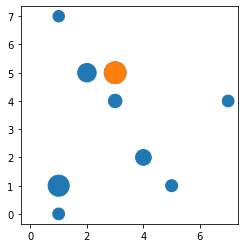

eventCount= 112  (orange: TOA tagged)


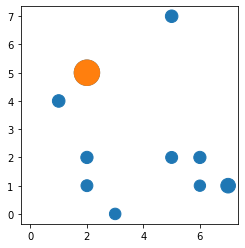

eventCount= 114  (orange: TOA tagged)


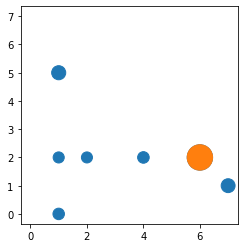

eventCount= 117  (orange: TOA tagged)


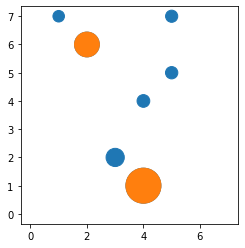

eventCount= 118  (orange: TOA tagged)


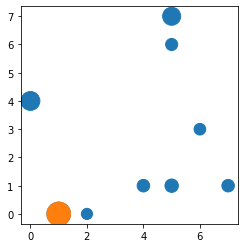

eventCount= 119  (orange: TOA tagged)


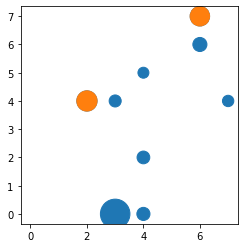

eventCount= 121  (orange: TOA tagged)


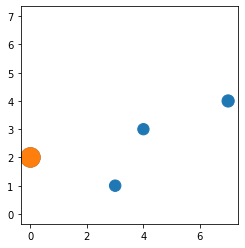

eventCount= 122  (orange: TOA tagged)


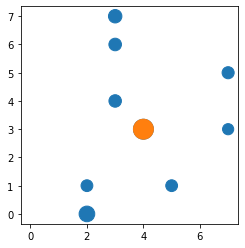

eventCount= 127  (orange: TOA tagged)


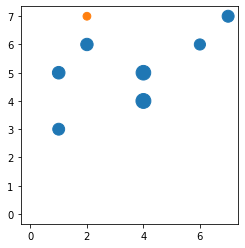

eventCount= 128  (orange: TOA tagged)


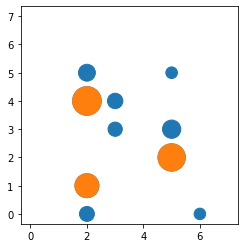

eventCount 137   nTotal= 2
DeltaTOA:   -4.0 toa  383.0  387.0 kx  0
hg:      710.0  579.0    (ped not subtracted)
TOT:      62.0   47.0
hg/TOT:     10.65  11.26   (assume hg ped 50)
eventCount= 137  (orange: TOA tagged)


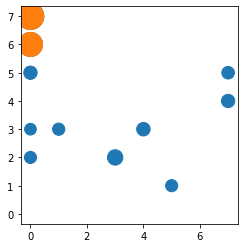

eventCount 201   nTotal= 2
DeltaTOA:   -3.0 toa  381.0  384.0 kx  5
hg:      516.0  577.0    (ped not subtracted)
TOT:      41.0   50.0
hg/TOT:     11.37  10.54   (assume hg ped 50)
eventCount= 201  (orange: TOA tagged)


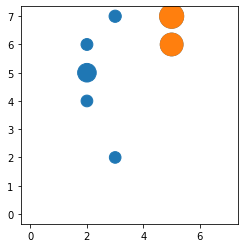

Total  235  events are analyzed.


207122

Warning in <TFile::Append>: Replacing existing TH1: toa_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits_deltaT (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HG_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HGoverTOT_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits_deltaT (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HG_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HGoverTOT_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits_deltaT (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HG_2hits (Potential memory leak).
Warning in <T

In [4]:
displayDone=0

h1={}
h2={}
hp={}

oname="histMuonAnalysis.root"
ofile=ROOT.TFile(oname,"RECREATE")

def displayHits(eventCount,HG,TOA):
    global displayDone
    if displayDone>0:
        return
    displayDone=1   # set flag to avoid same event displayed multiple times.
    
    HGtemp=np.copy(HG)
    HGtemp[HGtemp>3000.0]=0.0
    HGtemp[HGtemp<120]=0.0   # v1=140
    HGmax=np.amax(HGtemp)
            
    HGtempTOA=np.copy(HG)
    for i in np.arange(0,64,1):
        if TOA[i]<0.1 or TOA[i]>420.0:
            HGtempTOA[i]=0.0  # reset value if TOA does no exist
    HGmaxTOA=np.amax(HGtempTOA)
    
    x=np.zeros(64)
    y=np.zeros(64)
    z=np.zeros(64)
    ztoa=np.zeros(64)
    for i in range(0,64):
        j=caen2xy[i]
        kx=int(j%8)
        ky=int(j/8)
        x[i]=float(kx)
        y[i]=float(ky)
        if HGtemp[i]<2000.0:
            z[i]=HGtemp[i] 
        if HGtempTOA[i]<2000.0:
            ztoa[i]=HGtempTOA[i]
    print("eventCount=",eventCount," (orange: TOA tagged)")
    plt.scatter(x,y,z)
    plt.scatter(x,y,ztoa)
    plt.gca().set_aspect('equal')
    plt.show()
    return

def defineHistograms():
    global ofile
    global h1,h2,hp
    
    s="ChID"
    h1[s]=ROOT.TH1D(s,s,64,0.0,64.0)
    
    s="ChID_dtype3"
    h1[s]=ROOT.TH1D(s,s,64,0.0,64.0)
    
    s="EventID_dtype3"
    h1[s]=ROOT.TH1D(s,s,1200,0.0,1200.0)

    s="data_type_all"
    h1[s]=ROOT.TH1D(s,s,5,0.0,5.0)
    
    s="data_type_max"
    h1[s]=ROOT.TH1D(s,s,5,0.0,5.0)
    
    s="LG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_LG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="LG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_LG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="LG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)    
    s="a_LG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)

    s="HG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_HG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="HG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_HG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="HG_all_in_dtype3_event"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_HG_all_in_dtype3_event"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="HG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)    
    s="a_HG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="toa_all"
    h1[s]=ROOT.TH1D(s,s,1100,0.0,1100.0)
    s="a_toa_all"
    h1[s]=ROOT.TH1D(s,s,200,300.0,500.0)
    
    s="tot_all"
    h1[s]=ROOT.TH1D(s,s,1100,0.00,1100.0)
    s="a_tot_all"
    h1[s]=ROOT.TH1D(s,s,200,0.00,200.0)

    for i in range(64):
        
        s="LG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        s="HG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0) 
        s="toa_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        s="tot_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        
        s="a_LG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="a_HG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0) 
        s="a_toa_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="a_tot_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0) 
        
        #
        #  for AnalyzeTOA
        #
        
        s="toa_2hits"        
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="toa_2hits_deltaT"        
        h1[s]=ROOT.TH1D(s,s,100,-50.0,50.0)
        s="HG_2hits"        
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="HGoverTOT_2hits"        
        h1[s]=ROOT.TH1D(s,s,100,0.0,100.0)
    return

#   define all histograms here.
defineHistograms()

def analyzeTOA(eventCount,LG,HG,TOA,TOT,data_type):
    global h1,h2,hp

    tempTOA=np.copy(TOA)
    toaMax=np.amax(TOA)
    if toaMax < 1.0:        # skip event without TOA
        return
    
    nIX=np.zeros(8,dtype=int)
    toaIX=np.zeros((8,8))
    hgIX=np.zeros((8,8))
    totIX=np.zeros((8,8))
    for i in range(0,64):
        j=caen2xy[i]
        kx=int(j%8)
        ky=int(j/8)
        if tempTOA[i]>1.0:
            # print("eventCount",eventCount,"kx",kx,"ky",ky,tempTOA[i])
            toaIX[nIX[kx],kx]=tempTOA[i]
            hgIX[nIX[kx],kx]=HG[i]
            totIX[nIX[kx],kx]=TOT[i]
            nIX[kx]=nIX[kx]+1
    
    nTotal=np.sum(nIX)
    # print("eventCount",eventCount,"  nTotal=",nTotal)
    
    if nTotal == 2:
        for kx in range(0,8):   
            if(nIX[kx]==2):
                print("eventCount",eventCount,"  nTotal=",nTotal)
                delta=toaIX[0,kx]-toaIX[1,kx]
                print("DeltaTOA: {:6.1f} toa {:6.1f} {:6.1f} kx {:2d}"
                      .format(delta,toaIX[0,kx],toaIX[1,kx],kx))
                print("hg:     {:6.1f} {:6.1f}    (ped not subtracted)"
                      .format(hgIX[0,kx],hgIX[1,kx]))
                print("TOT:    {:6.1f} {:6.1f}"
                      .format(totIX[0,kx],totIX[1,kx]))
                r0=(hgIX[0,kx]-50.0)/totIX[0,kx]   # 50 as a crude pedestal value
                r1=(hgIX[1,kx]-50.0)/totIX[1,kx]
                print("hg/TOT:    {:6.2f} {:6.2f}   (assume hg ped 50)"
                      .format(r0,r1))
                s="toa_2hits"        
                h1[s].Fill(toaIX[0,kx])
                h1[s].Fill(toaIX[1,kx])
                s="toa_2hits_deltaT"        
                h1[s].Fill(delta)
                s="HG_2hits"        
                h1[s].Fill(hgIX[0,kx])
                h1[s].Fill(hgIX[1,kx])
                s="HGoverTOT_2hits"        
                h1[s].Fill(r0)
                h1[s].Fill(r1)
                displayHits(eventCount,HG,TOA) 
        
    return

def fillHistograms(eventCount,LG,HG,TOA,TOT,data_type):
    global h1,h2,hp
    
    lgtemp=np.copy(HG)
    lgtemp[lgtemp>4000.0]=0.0
    lgtemp[lgtemp<1.0]=0.0
    lgmax=np.amax(lgtemp)
    h1["LG_max"].Fill(lgmax)
    h1["a_LG_max"].Fill(lgmax)
    
    
    hgtemp=np.copy(HG)
    hgtemp[hgtemp>4000.0]=0.0
    hgtemp[hgtemp<140.0]=0.0
    hgmax=np.amax(hgtemp)
    h1["HG_max"].Fill(hgmax)
    h1["a_HG_max"].Fill(hgmax)
    
    datatypemax=np.amax(data_type)
    h1["data_type_max"].Fill(datatypemax)
    
    if datatypemax==3:
        h1["EventID_dtype3"].Fill(eventCount)
    
    for i in range(0,64):
        h1["data_type_all"].Fill(data_type[i])
        if data_type[i]==3:
            h1["ChID_dtype3"].Fill(i)

        h1["LG_all"].Fill(LG[i])
        h1["a_LG_all"].Fill(LG[i]) 
        if data_type[i]==3:
            h1["LG_all_dtype3"].Fill(LG[i])
            h1["a_LG_all_dtype3"].Fill(LG[i])
        
        h1["HG_all"].Fill(HG[i])
        h1["a_HG_all"].Fill(HG[i])
        if data_type[i]==3:
            h1["HG_all_dtype3"].Fill(HG[i])
            h1["a_HG_all_dtype3"].Fill(HG[i])
        if datatypemax==3:
            h1["HG_all_in_dtype3_event"].Fill(HG[i])
            h1["a_HG_all_in_dtype3_event"].Fill(HG[i])
        s="HG_"+str(i)
        h1[s].Fill(HG[i])
        s="a_HG_"+str(i)
        h1[s].Fill(HG[i])
        
        if TOA[i]>0.0:      
            h1["toa_all"].Fill(TOA[i])
            h1["a_toa_all"].Fill(TOA[i])
            s="toa_"+str(i)
            h1[s].Fill(TOA[i])
            s="a_toa_"+str(i)
            h1[s].Fill(TOA[i])

        if TOT[i]>0.0:
            h1["tot_all"].Fill(TOT[i])
            h1["a_tot_all"].Fill(TOT[i])
            s="tot_"+str(i)
            h1[s].Fill(TOT[i])
            s="a_tot_"+str(i)
            h1[s].Fill(TOT[i])
        
    #  return to caller.
    return
    


def analyzeRun():
    global displayDone
    
    nhitDisplayMax=50
    nhitDisplay=0
    
    eventCount=0
    with open(csvname,"r") as csvfile:
        reader=csv.reader(csvfile)
        for ix, row in enumerate(reader):
            displayDone=0
            # print(ix,"  ",row)
            if ix<5:
                continue
                
            if ix>400:
                break
            eventCount=eventCount+1
            rtcode,TStamp,LG,HG,TOA,TOT,data_type=unpackData(row)
            if rtcode>0:
                print("return code from unpackData is ",rtcode," Abort this job.")
                break

            fillHistograms(eventCount,LG,HG,TOA,TOT,data_type)
            analyzeTOA(eventCount,LG,HG,TOA,TOT,data_type)
            
            hgtemp=np.copy(HG)
            hgtemp[hgtemp>3000.0]=0.0
            hgtemp[hgtemp<120]=0.0   # v1=140
            hgmax=np.amax(hgtemp)
            
            hgtempTOA=np.copy(HG)
            for i in np.arange(0,64,1):
                if TOA[i]<0.1 or TOA[i]>420.0:
                    hgtempTOA[i]=0.0  # reset valu if TOA does no exist
            hgmaxTOA=np.amax(hgtempTOA)

            # for i in np.arange(0,64,1):
            #    print(i,HG[i],TOA[i],hgtempTOA[i])
            
            # print("ix=",ix," hgmax=",hgmax)
            
            if hgmaxTOA>1.0 and nhitDisplay<nhitDisplayMax:
                nhitDisplay=nhitDisplay+1
                displayHits(eventCount,HG,TOA)
    return eventCount
                
#  loop over all events to analyze.                          
eventCount=analyzeRun()
print("Total ",eventCount," events are analyzed.")
# write histograms to output root histogram file
ofile.Write()

# 8x8 display shows hits with amplitude > 120 ( >= 1 pe)

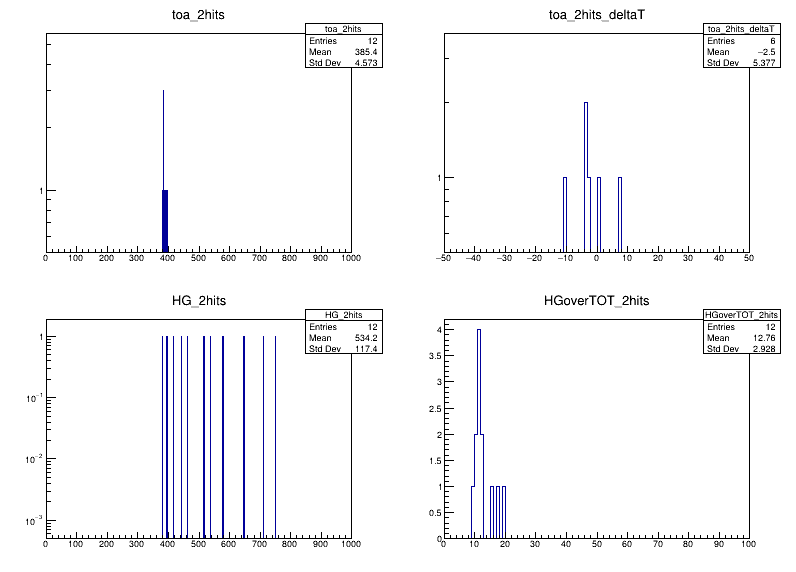

In [5]:
c10 = ROOT.TCanvas("c0","TOAanalysis",800,600)
c10.Divide(2,2)
c10.cd(1)
c10.GetPad(1).SetLogy()
h1["toa_2hits"].Draw()
c10.cd(2)
c10.GetPad(2).SetLogy()
h1["toa_2hits_deltaT"].Draw()

c10.cd(3)
c10.GetPad(3).SetLogy()
h1["HG_2hits"].Draw()
c10.cd(4)
# c10.GetPad(4).SetLogy()
h1["HGoverTOT_2hits"].Draw()
c10.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


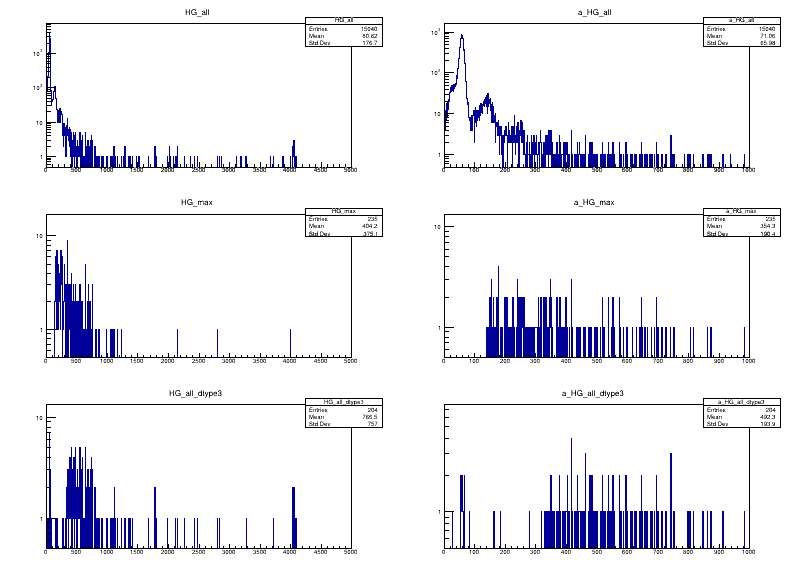

In [6]:
c0 = ROOT.TCanvas("c0","HGall",800,600)
c0.Divide(2,3)
c0.cd(1)
c0.GetPad(1).SetLogy()
h1["HG_all"].Draw()
c0.cd(2)
c0.GetPad(2).SetLogy()
h1["a_HG_all"].Draw()

c0.cd(3)
c0.GetPad(3).SetLogy()
h1["HG_max"].Draw()
c0.cd(4)
c0.GetPad(4).SetLogy()
h1["a_HG_max"].Draw()

c0.cd(5)
c0.GetPad(5).SetLogy()
h1["HG_all_dtype3"].Draw()
c0.cd(6)
c0.GetPad(6).SetLogy()
h1["a_HG_all_dtype3"].Draw()

c0.Draw()

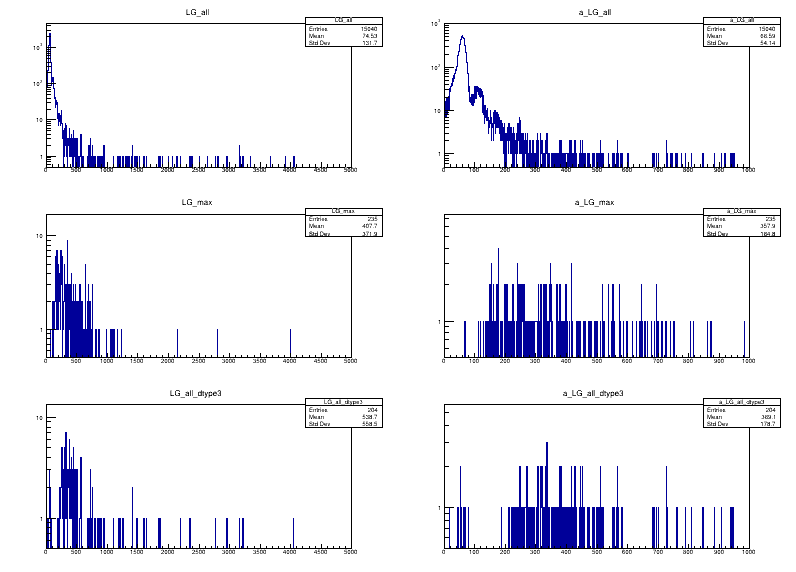

In [7]:
c0a = ROOT.TCanvas("c0a","LGall",800,600)
c0a.Divide(2,3)
c0a.cd(1)
c0a.GetPad(1).SetLogy()
h1["LG_all"].Draw()
c0a.cd(2)
c0a.GetPad(2).SetLogy()
h1["a_LG_all"].Draw()
c0a.cd(3)
c0a.GetPad(3).SetLogy()
h1["LG_max"].Draw()
c0a.cd(4)
c0a.GetPad(4).SetLogy()
h1["a_LG_max"].Draw()
c0a.cd(5)
c0a.GetPad(5).SetLogy()
h1["LG_all_dtype3"].Draw()
c0a.cd(6)
c0a.GetPad(6).SetLogy()
h1["a_LG_all_dtype3"].Draw()

c0a.Draw()

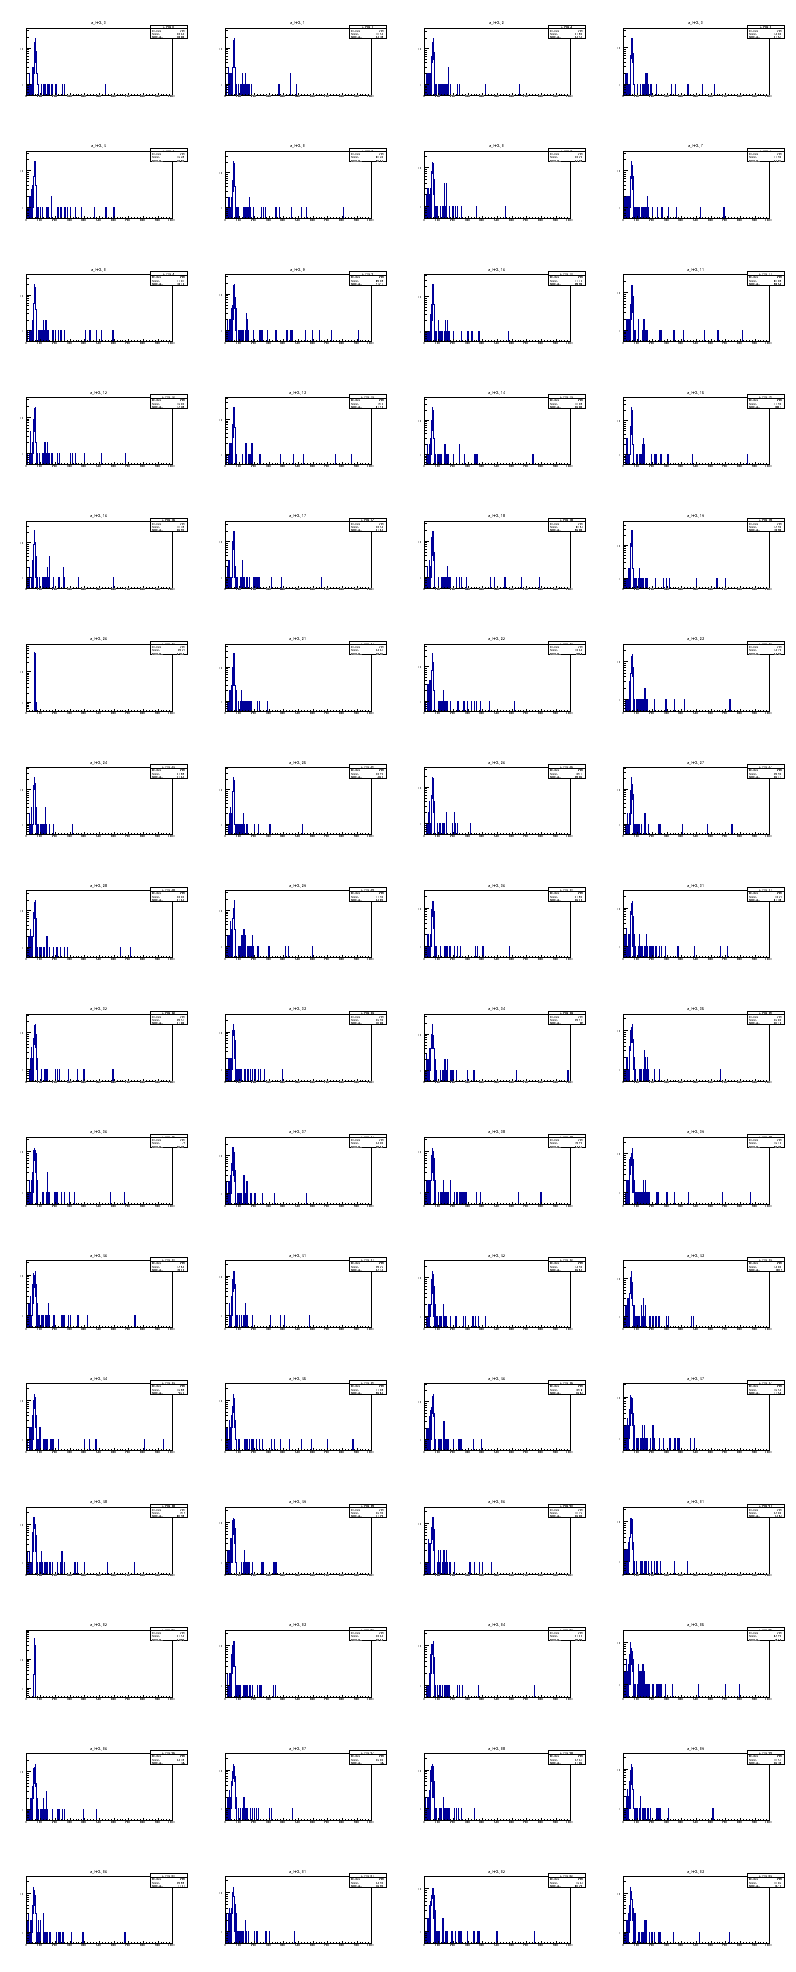

In [8]:
c1 = ROOT.TCanvas("c1","HG",800,2000)

c1.Divide(4,16)
for i in range(64):
    c1.cd(i+1)
    c1.GetPad(i+1).SetLogy()
    s="a_HG_"+str(i)
    h1[s].Draw()
c1.Draw()

nEvents 235.0   nEventsTOA 106.0    nTOA/nTotal 0.451063829787234
 nHG: >=1pe  6.7106382978723405
 nHG (dtype3): >=1pe  8.481132075471699


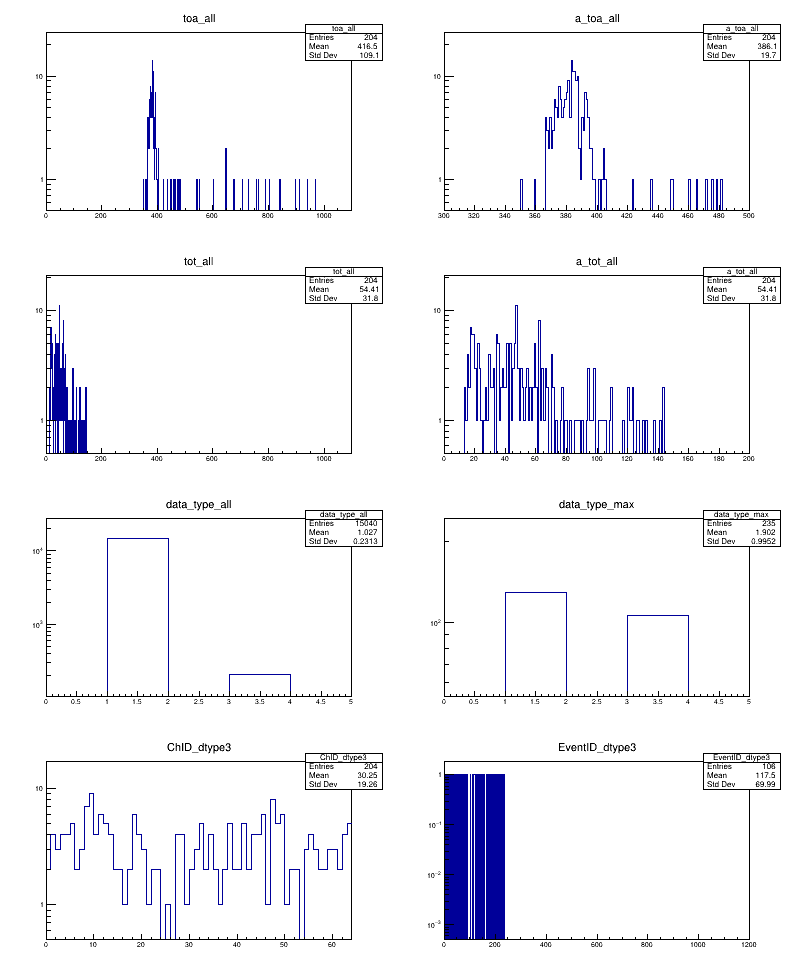

In [9]:
c2 = ROOT.TCanvas("c2","TOA",800,1000)

c2.Divide(2,4)
c2.cd(1)
c2.GetPad(1).SetLogy()
h1["toa_all"].Draw()
c2.cd(2)
c2.GetPad(2).SetLogy()
h1["a_toa_all"].Draw()
c2.cd(3)
c2.GetPad(3).SetLogy()
h1["tot_all"].Draw()
c2.cd(4)
c2.GetPad(4).SetLogy()
h1["a_tot_all"].Draw()
c2.cd(5)
c2.GetPad(5).SetLogy()
h1["data_type_all"].Draw()
c2.cd(6)
c2.GetPad(6).SetLogy()
h1["data_type_max"].Draw()
c2.cd(7)
c2.GetPad(7).SetLogy()
h1["ChID_dtype3"].Draw()
c2.cd(8)
c2.GetPad(8).SetLogy()
h1["EventID_dtype3"].Draw()
c2.Draw()

nEvents=h1["data_type_max"].GetEntries()
nEventsTOA=h1["data_type_max"].GetBinContent(4)
print("nEvents",nEvents,"  nEventsTOA",nEventsTOA,"   nTOA/nTotal",nEventsTOA/nEvents)

nxbins=h1["a_HG_all"].GetNbinsX()
nhg1pe=0.0
for ix in np.arange(1,nxbins,1):
    xc=h1["a_HG_all"].GetBinCenter(int(ix))
    if xc > 100.0:
        nhg1pe=nhg1pe+h1["a_HG_all"].GetBinContent(int(ix))

nhg1pe_average=nhg1pe/float(nEvents)
print(" nHG: >=1pe ",nhg1pe_average)
        
nxbins=h1["a_HG_all_in_dtype3_event"].GetNbinsX()
nhg1pe_dtype2=0.0
for ix in np.arange(1,nxbins,1):
    xc=h1["a_HG_all_in_dtype3_event"].GetBinCenter(int(ix))
    if xc > 100.0:
        nhg1pe_dtype2=nhg1pe_dtype2+h1["a_HG_all_in_dtype3_event"].GetBinContent(int(ix))

nhg1pe_dtype2_average=nhg1pe_dtype2/float(nEventsTOA)
print(" nHG (dtype3): >=1pe ",nhg1pe_dtype2_average)


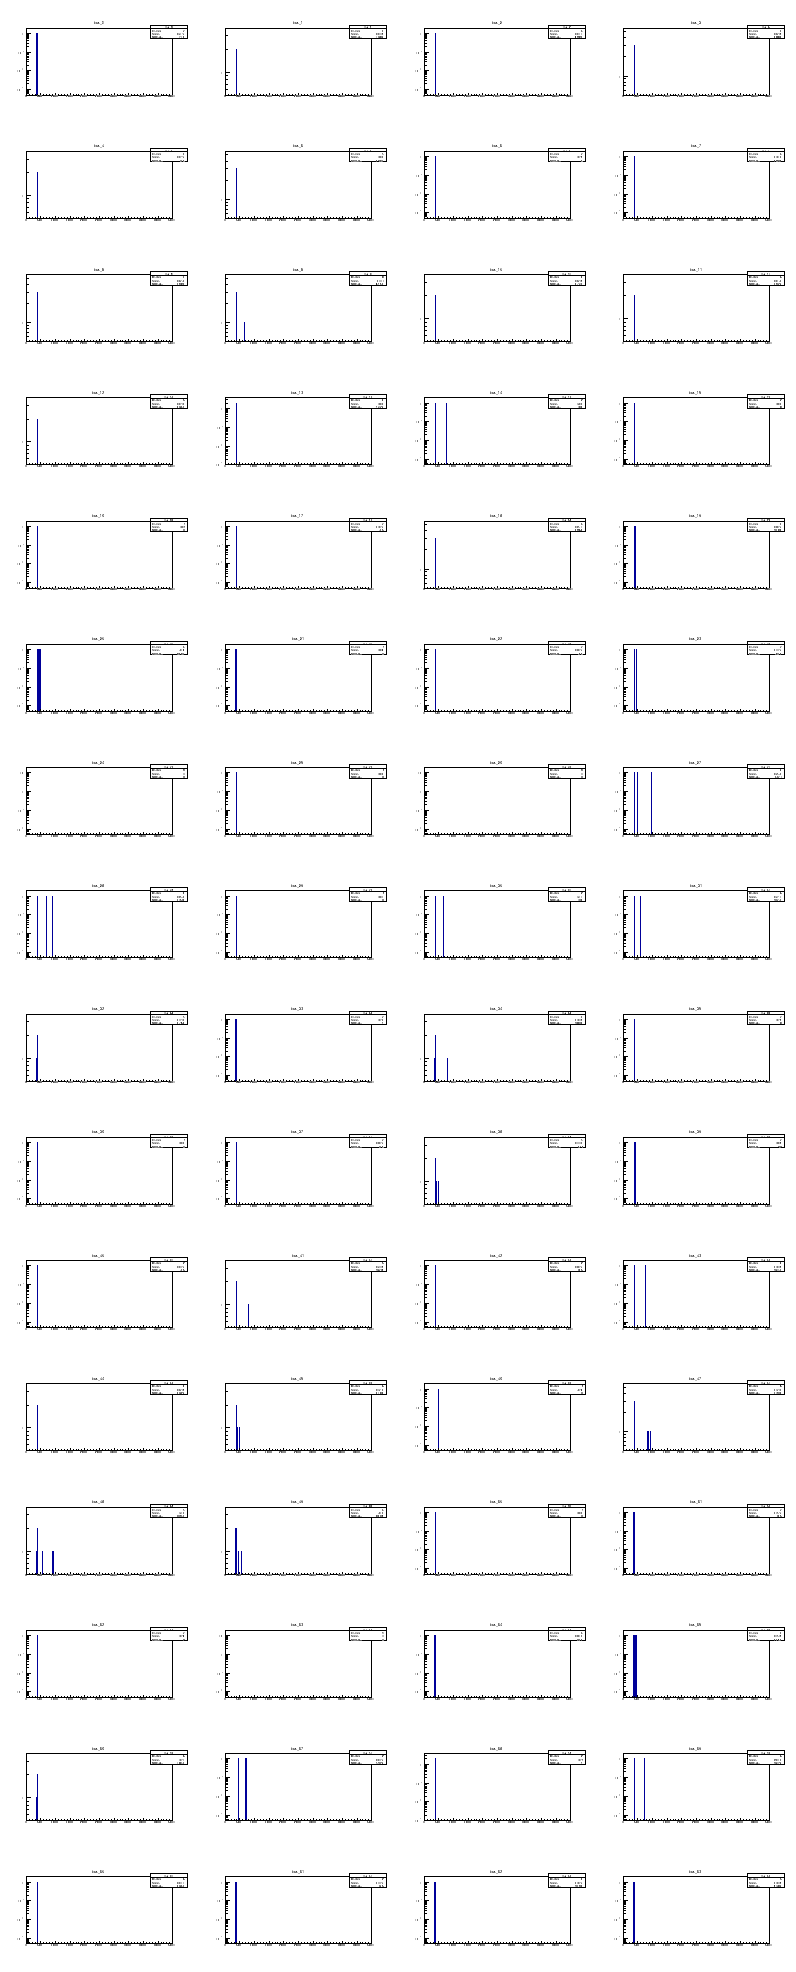

In [10]:
c3 = ROOT.TCanvas("c3","TOA",800,2000)

c3.Divide(4,16)
for i in range(64):
    c3.cd(i+1)
    c3.GetPad(i+1).SetLogy()
    s="toa_"+str(i)
    h1[s].Draw()
c3.Draw()